## Importación de Librerías

Comenzaremos importando las librerías necesarias para nuestro análisis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

## Carga de Datos

Cargamos los datos desde el archivo CSV en un DataFrame de pandas.

In [2]:
df = pd.read_csv("dataset/movies_and_tvshows.csv")

# Preprocesamiento de Datos

En esta sección, realizaremos las siguientes tareas de preprocesamiento en nuestro conjunto de datos:

1. Convertir la columna `metascore` a una escala de 1 a 10 para hacerla comparable con `user_score`.
2. Convertir la columna `release_date` a datetime.
3. Procesar los géneros y convertirlos en columnas individuales.
4. Convertir la duración de películas y series a minutos y número de temporadas respectivamente.


In [3]:
# Función optimizada para convertir duración
def min_converter_optimized(duration):
    """
    Convierte la duración en formato 'X h Y min' a minutos.
    Args:
    - duration (str): Duración en formato 'X h Y min' o similar.
    Returns:
    - int: Duración en minutos.
    """
    if duration:
        hours = int(re.search(r'(\d+)\s*h', duration).group(1)) * 60 if 'h' in duration else 0
        minutes = int(re.search(r'(\d+)\s*min', duration).group(1)) if 'min' in duration else 0
        return hours + minutes
    return None

# Convertir fechas a datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Procesamiento de géneros

df['genres'] = df['genres'].apply(eval)  # Convierte string a lista
generos_unicos = set.union(*df['genres'].apply(set))
generos_unicos = list(generos_unicos)
for genre in generos_unicos:
    df[genre] = df["genres"].apply(lambda x: 1 if genre in x else 0)
df.drop('genres', axis=1, inplace=True)

# Conversión de duración
df.loc[df['type'] == 'movie', 'duration'] = df.loc[df['type'] == 'movie', 'duration'].apply(min_converter_optimized)
df.loc[df['type'] == 'tvshow', 'duration'] = df.loc[df['type'] == 'tvshow', 'duration'].apply(lambda x: int(x.split()[0]))

# Almacenar la lista de géneros para películas y series en variables separadas
genres_movies = df[df['type'] == 'movie'][list(generos_unicos)].sum()
genres_series = df[df['type'] == 'tvshow'][list(generos_unicos)].sum()

genres_movies = genres_movies[genres_movies > 0].index.tolist()  # Lista de géneros de películas
genres_series = genres_series[genres_series > 0].index.tolist()  # Lista de géneros de series

# Obtener el año de lanzamiento (mismo para todas las entradas)
year = df["release_date"].dt.year[0]

## Análisis Estadístico Inicial

Realizaremos un análisis estadístico básico para obtener una visión general de los datos. Esto incluirá un resumen estadístico de las variables numéricas, la distribución de tipos (película o serie), y un resumen de la presencia de diferentes géneros.


In [4]:
# Separar los datos en películas y series
movies = df[df['type'] == 'movie']
tvshows = df[df['type'] == 'tvshow']

# Estadísticas para películas
movies_stats = movies.describe()
movies_genre_summary = movies[genres_movies].sum().sort_values(ascending=False)

# Estadísticas para series
tvshows_stats = tvshows.describe()
tvshows_genre_summary = tvshows[genres_series].sum().sort_values(ascending=False)

movies_stats, movies_genre_summary, tvshows_stats, tvshows_genre_summary


(                        release_date   metascore  user_score  weighted_score  \
 count                            304  304.000000  304.000000      304.000000   
 mean   2023-07-09 08:03:09.473684224    5.941447    5.827961        5.862171   
 min              2023-01-13 00:00:00    1.600000    1.500000        2.300000   
 25%              2023-04-21 00:00:00    4.800000    4.800000        5.000000   
 50%              2023-07-16 12:00:00    5.900000    5.800000        5.800000   
 75%              2023-10-06 00:00:00    7.300000    6.900000        6.800000   
 max              2023-12-08 00:00:00    9.500000   10.000000        9.400000   
 std                              NaN    1.559108    1.521000        1.352732   
 
           Unknown  Documentary    Thriller       Crime       Drama  \
 count  304.000000   304.000000  304.000000  304.000000  304.000000   
 mean     0.003289     0.108553    0.013158    0.036184    0.121711   
 min      0.000000     0.000000    0.000000    0.000000 

## Distribución de Géneros

Calcularemos la distribución de cada género en nuestro conjunto de datos.


C:\Users\ikera\AppData\Local\Temp\ipykernel_3024\4054551705.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")


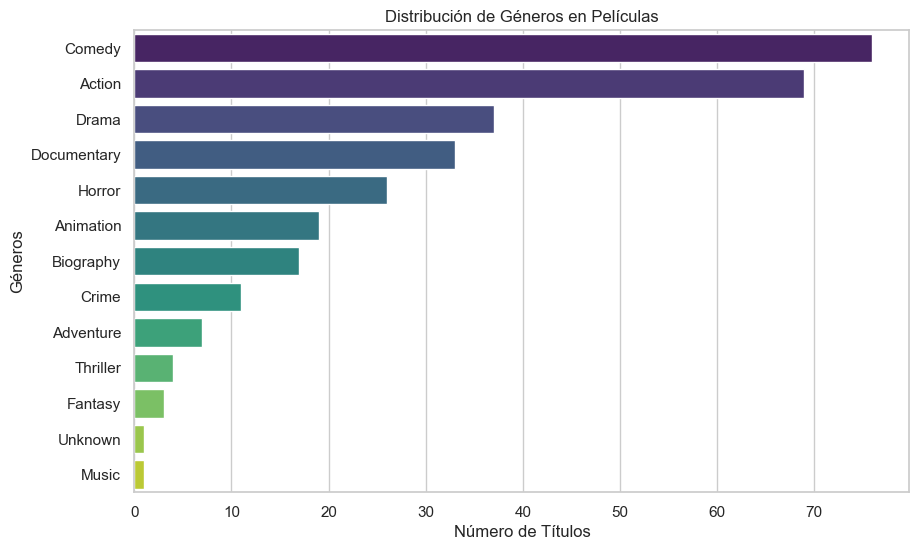

C:\Users\ikera\AppData\Local\Temp\ipykernel_3024\4054551705.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")


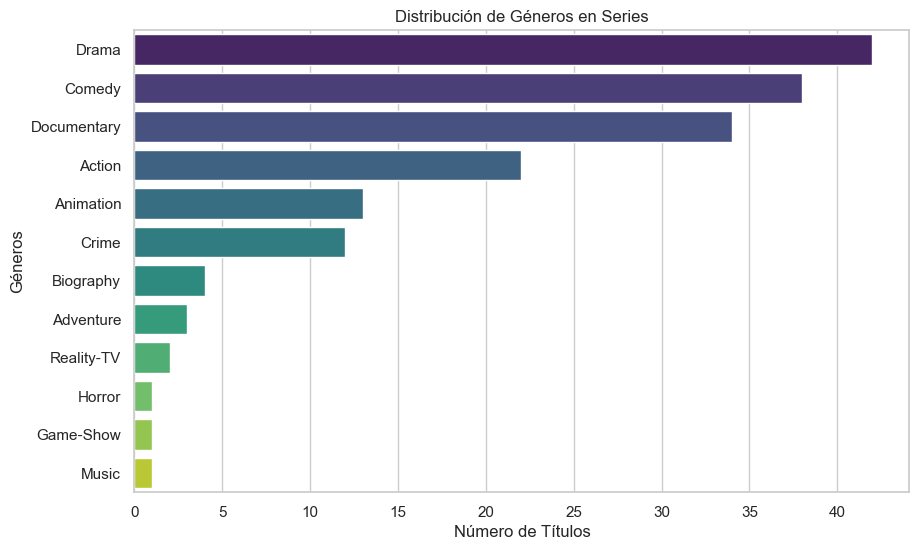

In [5]:
# Configuraciones para visualizaciones
sns.set(style="whitegrid")

# Función para crear gráficos de barras para géneros
def plot_genre_distribution(genre_counts, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
    plt.title(title)
    plt.xlabel('Número de Títulos')
    plt.ylabel('Géneros')
    plt.show()

# Gráfico de barras para géneros de películas
plot_genre_distribution(movies_genre_summary, 'Distribución de Géneros en Películas')

# Gráfico de barras para géneros de series
plot_genre_distribution(tvshows_genre_summary, 'Distribución de Géneros en Series')



# Análisis de Géneros y Calificaciones

## Calificación Media por Género
Realizamos un análisis para entender cómo las calificaciones medias (weighted score) varían entre diferentes géneros. Este análisis puede revelar qué géneros son más populares o mejor valorados por la audiencia y los críticos.


C:\Users\ikera\AppData\Local\Temp\ipykernel_3024\2061754868.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Weighted Score', y='Genre', data=genre_scores_sorted, palette="rocket")


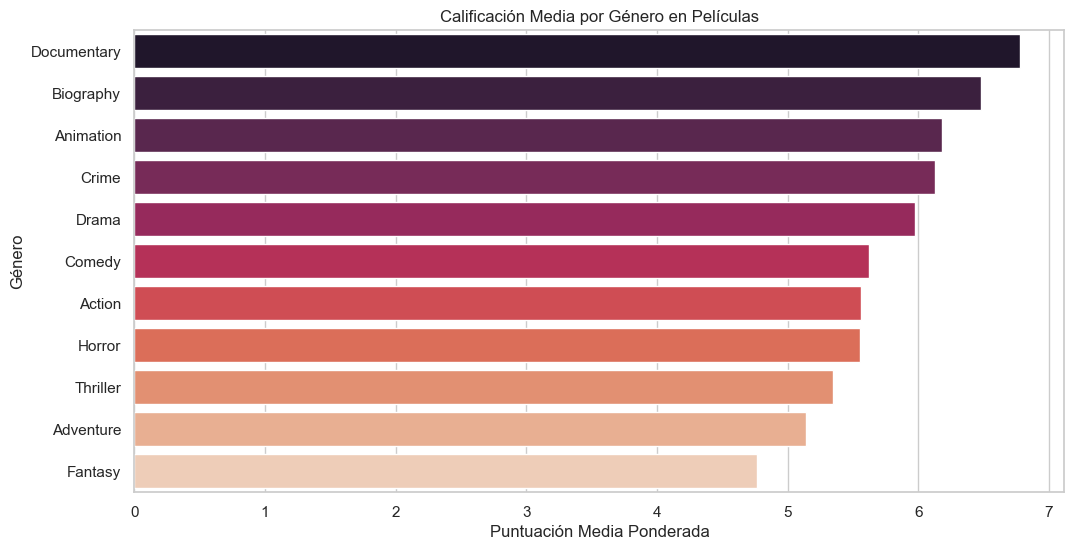

C:\Users\ikera\AppData\Local\Temp\ipykernel_3024\2061754868.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Weighted Score', y='Genre', data=genre_scores_sorted, palette="rocket")


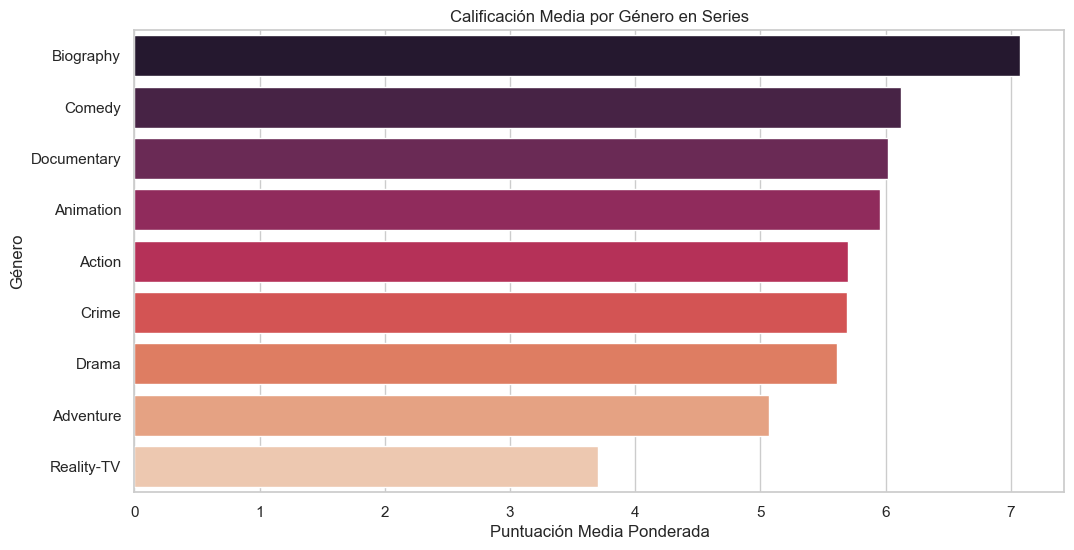

In [6]:

# Inicializar una lista para almacenar los datos de género y sus calificaciones medias
genre_scores_data = []

for genre in genres_movies:
    # Calcular la calificación media para cada género
    mean_score = movies[movies[genre] == 1]['weighted_score'].mean()
    if movies_genre_summary[genre] > 1:
        genre_scores_data.append({'Genre': genre, 'Average Weighted Score': mean_score})

# Convertir la lista en un DataFrame
genre_scores_df = pd.DataFrame(genre_scores_data)

# Ordenar los resultados
genre_scores_sorted = genre_scores_df.sort_values('Average Weighted Score', ascending=False)

# Visualizar los resultados en un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Average Weighted Score', y='Genre', data=genre_scores_sorted, palette="rocket")
plt.title('Calificación Media por Género en Películas')
plt.xlabel('Puntuación Media Ponderada')
plt.ylabel('Género')
plt.show()

genre_scores_data = []
for genre in genres_series:
    # Calcular la calificación media para cada género
    mean_score = tvshows[tvshows[genre] == 1]['weighted_score'].mean()
    if tvshows_genre_summary[genre] > 1:
        genre_scores_data.append({'Genre': genre, 'Average Weighted Score': mean_score})
    
# Convertir la lista en un DataFrame
genre_scores_df = pd.DataFrame(genre_scores_data)

# Ordenar los resultados
genre_scores_sorted = genre_scores_df.sort_values('Average Weighted Score', ascending=False)

# Visualizar los resultados en un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Average Weighted Score', y='Genre', data=genre_scores_sorted, palette="rocket")
plt.title('Calificación Media por Género en Series')
plt.xlabel('Puntuación Media Ponderada')
plt.ylabel('Género')
plt.show()


## Comparación de Metascores y User Scores

Utilizamos gráficos de caja para comparar la distribución de Metascores y User Scores entre películas y series.

C:\Users\ikera\AppData\Local\Temp\ipykernel_3024\294078069.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y=column, data=data, palette="coolwarm")


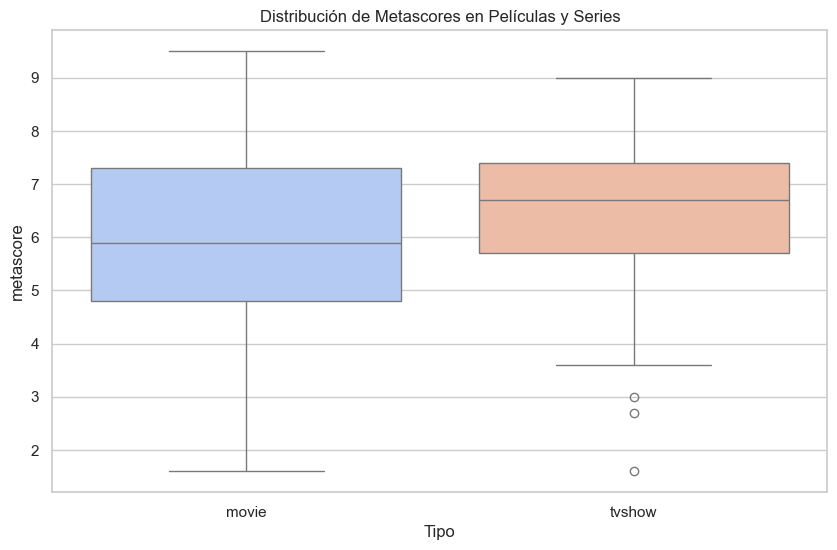

C:\Users\ikera\AppData\Local\Temp\ipykernel_3024\294078069.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y=column, data=data, palette="coolwarm")


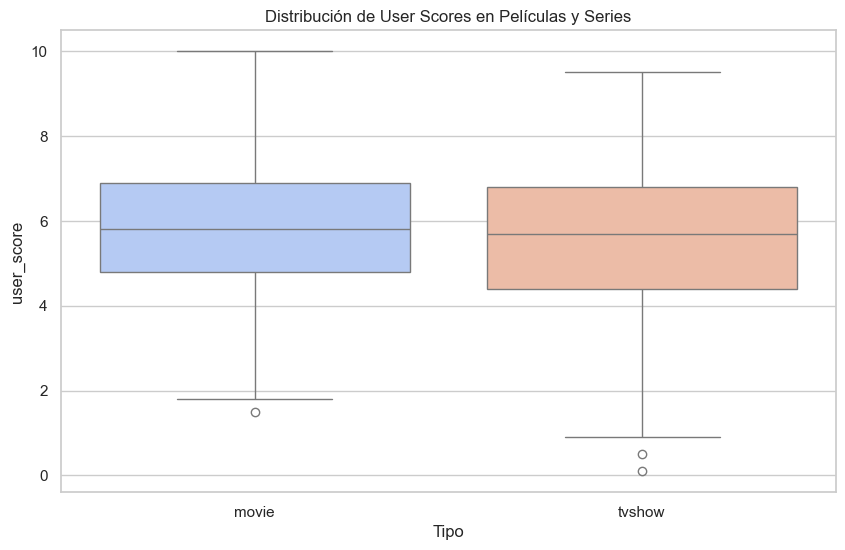

In [7]:
# Función para crear gráficos de caja
def plot_boxplot(data, column, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='type', y=column, data=data, palette="coolwarm")
    plt.title(title)
    plt.xlabel('Tipo')
    plt.ylabel(column)
    plt.show()

# Gráficos de caja para Metascores y User Scores
plot_boxplot(df, 'metascore', 'Distribución de Metascores en Películas y Series')
plot_boxplot(df, 'user_score', 'Distribución de User Scores en Películas y Series')



# Análisis Temporal 

Hemos analizado la distribución de lanzamientos de películas y series a lo largo del año. El objetivo es identificar si hay meses específicos con una mayor cantidad de lanzamientos, lo que podría indicar períodos de alta actividad en la industria del entretenimiento.


C:\Users\ikera\AppData\Local\Temp\ipykernel_3024\3011906894.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['month'] = movies['release_date'].dt.month_name()
C:\Users\ikera\AppData\Local\Temp\ipykernel_3024\3011906894.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvshows['month'] = tvshows['release_date'].dt.month_name()
C:\Users\ikera\AppData\Local\Temp\ipykernel_3024\3011906894.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. 

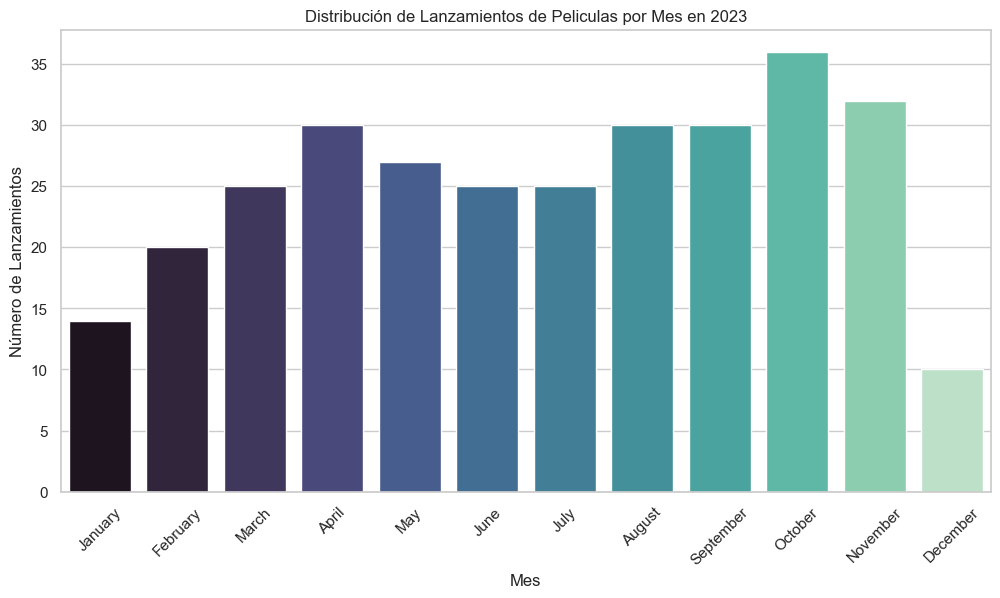

C:\Users\ikera\AppData\Local\Temp\ipykernel_3024\3011906894.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=temporal_data_tvshows['release_date'].dt.month_name(), palette="mako", order=tvshows_monthly_releases.index)


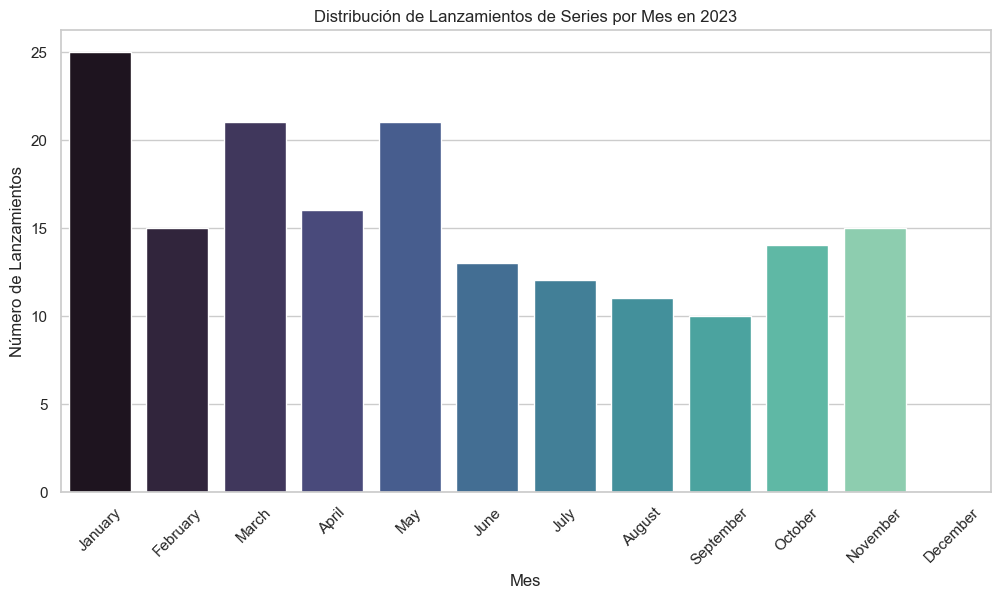

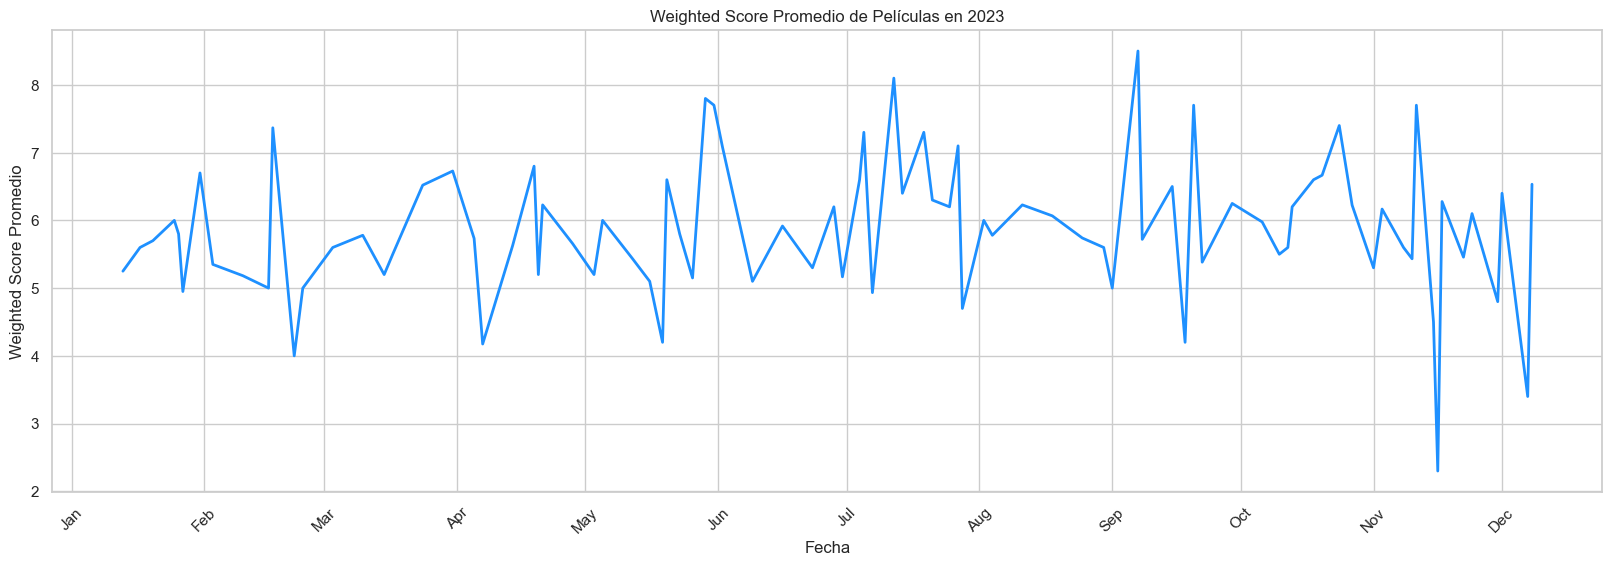

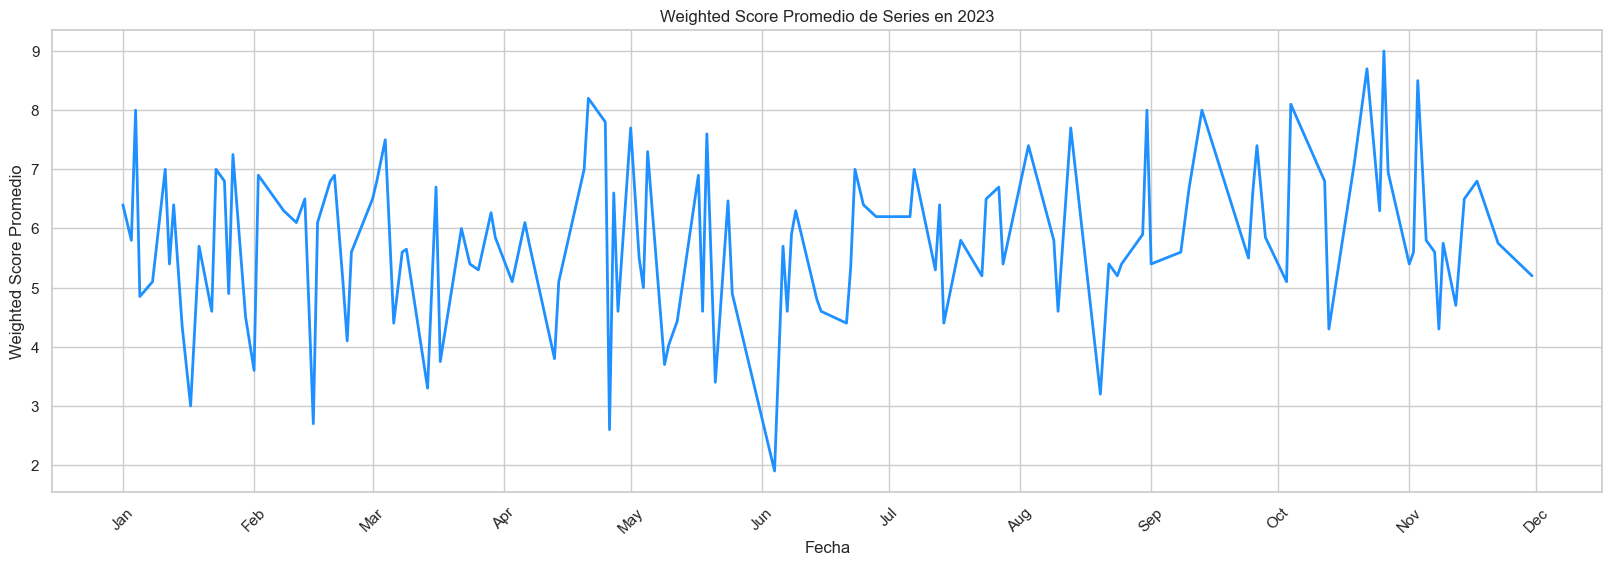

In [8]:
import matplotlib.dates as mdates

movies['month'] = movies['release_date'].dt.month_name()
tvshows['month'] = tvshows['release_date'].dt.month_name()

# Contar lanzamientos por mes
movie_monthly_releases = movies['month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'])

tvshows_monthly_releases = tvshows['month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'])

# Crear un nuevo DataFrame para análisis temporal detallado
temporal_data_movies = movies[['release_date', 'weighted_score']].copy()
temporal_data_tvshows = tvshows[['release_date', 'weighted_score']].copy()

# Crear un DataFrame para el análisis temporal
daily_data_movies = temporal_data_movies.groupby(temporal_data_movies['release_date']).mean()
daily_data_tvshows = temporal_data_tvshows.groupby(temporal_data_tvshows['release_date']).mean()

# Gráfico de lanzamientos por mes de las PELICULAS(número de lanzamientos)
plt.figure(figsize=(12, 6))
sns.countplot(x=temporal_data_movies['release_date'].dt.month_name(), palette="mako", order=movie_monthly_releases.index)
plt.xticks(rotation=45)
plt.xlabel('Mes')
plt.ylabel('Número de Lanzamientos')
plt.title(f'Distribución de Lanzamientos de Peliculas por Mes en {year}')
plt.show()

# Gráfico de lanzamientos por mes de las SERIES (número de lanzamientos)
plt.figure(figsize=(12, 6))
sns.countplot(x=temporal_data_tvshows['release_date'].dt.month_name(), palette="mako", order=tvshows_monthly_releases.index)
plt.xticks(rotation=45)
plt.xlabel('Mes')
plt.ylabel('Número de Lanzamientos')
plt.title(f'Distribución de Lanzamientos de Series por Mes en {year}')
plt.show()

# Gráfico de líneas para el score promedio de las PELICULAS
plt.figure(figsize=(20, 6))
plt.plot(daily_data_movies.index, daily_data_movies['weighted_score'], marker='', color='dodgerblue', linewidth=2)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_minor_locator(mdates.DayLocator())
plt.xticks(rotation=45)
plt.xlabel('Fecha')
plt.ylabel('Weighted Score Promedio')
plt.title(f'Weighted Score Promedio de Películas en {year}')
plt.grid(True)
plt.show()

# Gráfico de líneas para el score promedio de las SERIES
plt.figure(figsize=(20, 6))
plt.plot(daily_data_tvshows.index, daily_data_tvshows['weighted_score'], marker='', color='dodgerblue', linewidth=2)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_minor_locator(mdates.DayLocator())
plt.xticks(rotation=45)
plt.xlabel('Fecha')
plt.ylabel('Weighted Score Promedio')
plt.title(f'Weighted Score Promedio de Series en {year}')
plt.grid(True)
plt.show()


# Análisis de Correlaciones

Realizamos un análisis de correlación para explorar las relaciones entre el 'weighted score' y otras variables numéricas como la duración, metascore y user score. Este análisis puede ayudar a identificar qué factores están más fuertemente asociados con las altas calificaciones.

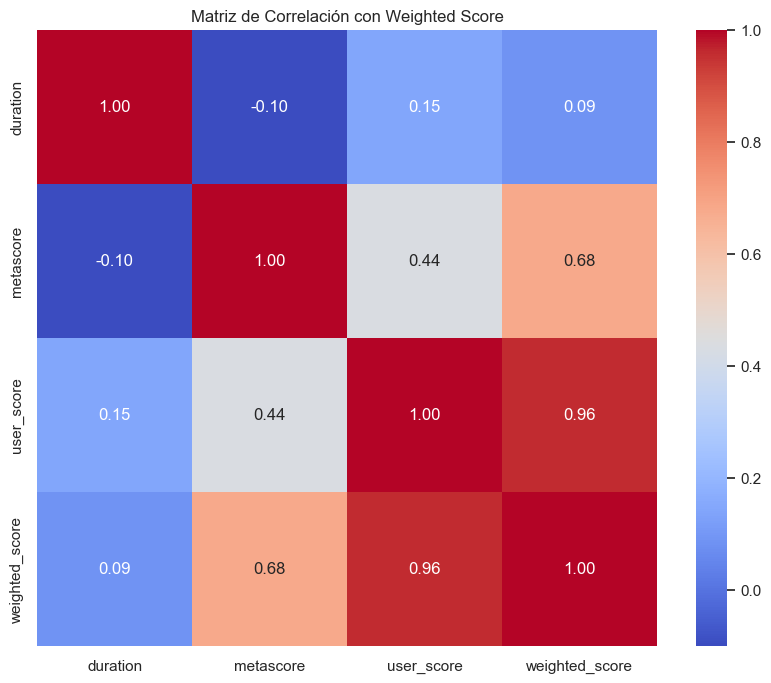

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de que 'correlation_data' contenga las columnas 'duration', 'metascore', 'user_score', 'weighted_score'
correlation_data = df[['duration', 'metascore', 'user_score', 'weighted_score']]

# Calcular la matriz de correlación
correlation_matrix = correlation_data.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación con Weighted Score')
plt.show()
